<h1 align="center"><font size="5">AI: Regression</font></h1>

<h1 align="center"><font size="5">Regression usage on Fuel Consumption vs CO2 Emission data</font></h1>

<h1 align="center"><font size="2">In this project I use my own designed Regression and DataTable packages to predict a CO2 Emission based on car characteristics.</font></h1>


I'll walk you through this process of model definition, fine-tuning and evaluation. You might want to jump to the interesting section immediately.

In [1]:
import data_reader as dr
import regression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

{'2': 1}


In [2]:
from helper_methods import *

In [3]:
main_data_table = dr.DataTable("data/FuelConsumption.csv")

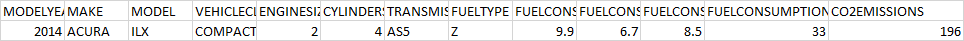

In [4]:
main_data_table.head

['MODELYEAR',
 'MAKE',
 'MODEL',
 'VEHICLECLASS',
 'ENGINESIZE',
 'CYLINDERS',
 'TRANSMISSION',
 'FUELTYPE',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

In [5]:
main_data_table.activate_features(["FUELCONSUMPTION_COMB_MPG", "ENGINESIZE"])
main_data_table.select_target("CO2EMISSIONS")

Feature FUELCONSUMPTION_COMB_MPG was added
Feature ENGINESIZE was added
Target CO2EMISSIONS was added


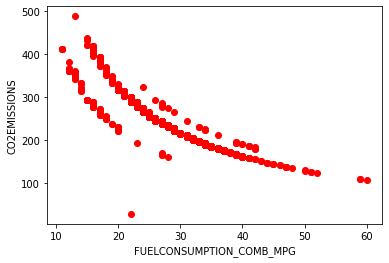

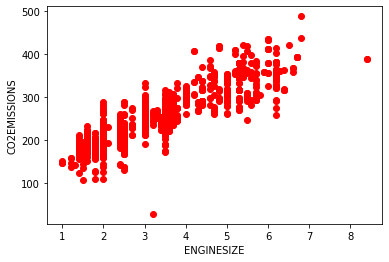

In [6]:
main_data_table.plot(features2target=True)

In [7]:
main_data_table.features

{'FUELCONSUMPTION_COMB_MPG': <data_reader.DataTable._DataColumn at 0x2815f360c18>,
 'ENGINESIZE': <data_reader.DataTable._DataColumn at 0x2815f360a90>}

In [8]:
main_data_table.deactivate_feature("ENGINESIZE")

Feature ENGINESIZE was disabled from the training set


In [9]:
main_data_table.features

{'FUELCONSUMPTION_COMB_MPG': <data_reader.DataTable._DataColumn at 0x2815f360c18>}

In [10]:
main_data_table.split_data(0.6, 0.2, shuffle=True)

Shuffle was done
Data was split as follows: 0.6 training set, 0.2 cross-validation set and 0.2 test set


In [11]:
training_data = main_data_table.get_training_data()
cv_data = main_data_table.get_cv_data()
testing_data = main_data_table.get_testing_data()

In [12]:
training_data[0][0] # feature data

[22.0]

In [13]:
training_data[1][0] # target data

290.0

In [14]:
data_labels = main_data_table.get_labels()

In [15]:
data_labels

(['FUELCONSUMPTION_COMB_MPG'], 'CO2EMISSIONS')

In [16]:
regression_model = regression.Regression()
regression_model.set_labels(data_labels)
regression_model.set_training_data(training_data[0], training_data[1])
regression_model.set_testing_data(testing_data[0], testing_data[1])

True

In [17]:
regression_model

In [18]:
regression_model.RANDOM_WEIGHT_INITIALIZATION = 10

In [19]:
regression_model.epoch = 100
regression_model.alpha = 0.5
regression_model.regularization = 0

In [20]:
regression_model.create_coefficients_array()

[-1, 10]

In [21]:
coeffs = regression_model.fit()

Iteration 26 done
Iteration 51 done
Iteration 76 done
Training is completed with 100 iterations


In [22]:
coeffs

[6.11830367314164e+256, 1.758394889170301e+258]

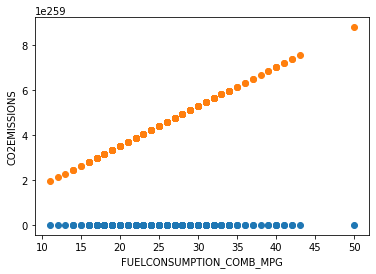

In [23]:
test_features, test_target = testing_data
training_features, training_target = training_data
plot2d_target2predict(regression_model, test_features, test_target,
                      feature_name="FUELCONSUMPTION_COMB_MPG", 
                      target_name="CO2EMISSIONS",
                      feature_idx = 0, loc_place="upper left"):

In [24]:
regression_model.alpha = 0.01

In [25]:
regression_model.create_coefficients_array()

[9, 1]

In [26]:
regression_model.ROUND_AFTER_COMA = 4

In [27]:
coeffs = regression_model.fit()

Iteration 26 done
Iteration 51 done
Iteration 76 done
Training is completed with 100 iterations


In [28]:
coeffs

[-3.39871770760239e+81, -9.767883658693831e+82]

In [29]:
regression_model.alpha = 0.001
regression_model.create_coefficients_array()
regression_model.regularization = 0.2

In [30]:
coeffs = regression_model.fit()
coeffs

Iteration 26 done
Iteration 51 done
Iteration 76 done
Training is completed with 100 iterations


[-0.1962, 8.3279]

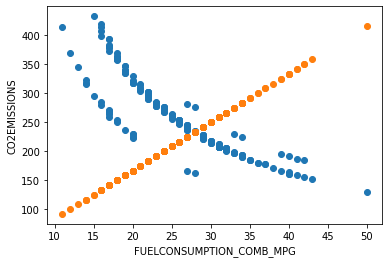

In [31]:
predicted = []
for test in test_features:
    predicted.append(regression_model.predict(test))
axis1 = column2list(test_features, 0)
plt.scatter(axis1, test_target)
plt.scatter(axis1, predicted)
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [32]:
regression_model.alpha = 0.005
regression_model.create_coefficients_array()
regression_model.epoch = 1000

In [33]:
coeffs = regression_model.fit()
coeffs

Iteration 251 done
Iteration 501 done
Iteration 751 done
Training is completed with 1000 iterations


[nan, nan]

In [34]:
regression_model.alpha = 0.005
regression_model.create_coefficients_array(True)
regression_model.epoch = 500

In [35]:
regression_model.coefficients

[0.2, 0.3]

In [36]:
coeffs = regression_model.fit()
coeffs

Iteration 126 done
Iteration 251 done
Iteration 376 done
Training is completed with 500 iterations


[-1.3970451977407825e+224, -4.015095142189804e+225]

That's the moment when we have to scale our data

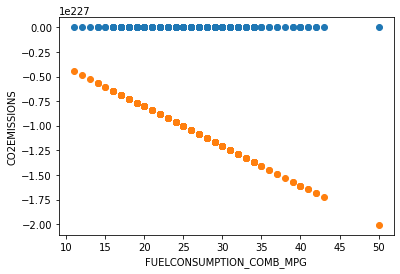

In [37]:
predicted = []
for test in test_features:
    predicted.append(regression_model.predict(test))
axis1 = column2list(test_features, 0)
plt.scatter(axis1, test_target)
plt.scatter(axis1, predicted)
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [38]:
main_data_table.max_scaling()

Column MODELYEAR was scaled
Column MAKE was scaled
Column MODEL was scaled
Column VEHICLECLASS was scaled
Column ENGINESIZE was scaled
Column CYLINDERS was scaled
Column TRANSMISSION was scaled
Column FUELTYPE was scaled
Column FUELCONSUMPTION_CITY was scaled
Column FUELCONSUMPTION_HWY was scaled
Column FUELCONSUMPTION_COMB was scaled
Column FUELCONSUMPTION_COMB_MPG was scaled
Column CO2EMISSIONS was scaled


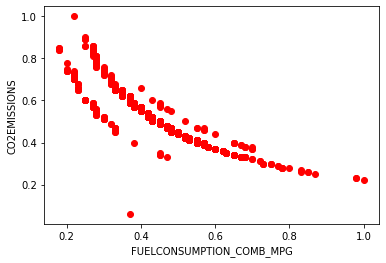

In [40]:
main_data_table.plot(features2target=True)

In [41]:
training_data = main_data_table.get_training_data()
cv_data = main_data_table.get_cv_data()
testing_data = main_data_table.get_testing_data()

In [42]:
regression_model.set_training_data(training_data[0], training_data[1])
regression_model.set_testing_data(testing_data[0], testing_data[1])

True

In [43]:
regression_model.epoch = 100
regression_model.alpha = 0.5
regression_model.regularization = 0
regression_model.create_coefficients_array()

[5, -5]

In [44]:
regression_model.fit()

Iteration 26 done
Iteration 51 done
Iteration 76 done
Training is completed with 100 iterations


[2.0425, -3.3987]

Text(0, 0.5, 'CO2EMISSIONS')

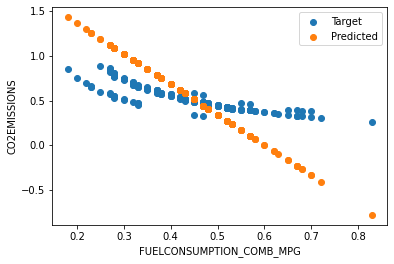

In [47]:
testing_features, testing_target = testing_data
training_features, training_target = training_data
predicted = []
for test in test_features:
    predicted.append(regression_model.predict(test))
axis1 = column2list(test_features, 0)
plt.scatter(axis1, testing_target, label="Target")
plt.scatter(axis1, predicted, label="Predicted")
plt.legend(loc="upper right")
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")

In [54]:
regression_model.evaluation(testing_data, metric="MAE")

0.0427

In [48]:
regression_model.epoch = 1000
regression_model.create_coefficients_array()
regression_model.fit()

Iteration 251 done
Iteration 501 done
Iteration 751 done
Training is completed with 1000 iterations


[0.9466, -0.9532]

Text(0, 0.5, 'CO2EMISSIONS')

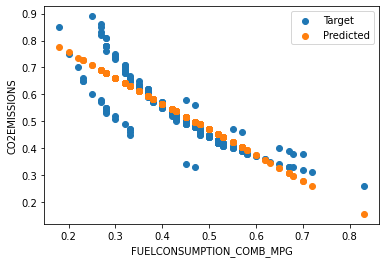

In [49]:
predicted = []
for test in test_features:
    predicted.append(regression_model.predict(test))
axis1 = column2list(test_features, 0)
plt.scatter(axis1, testing_target, label="Target")
plt.scatter(axis1, predicted, label="Predicted")
plt.legend(loc="upper right")
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2EMISSIONS")

In [53]:
regression_model.evaluation(testing_data, metric="MAE")

0.0427